In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Estadística y Probabilidad/TP1/dataset2020.csv')

#Posibles preguntas de análisis:
#¿Cuál es la distribución de las llamadas por edad y género de la víctima? ¿Hay grupos de edad o género que llaman con más frecuencia?
#¿Cuál es la distribución geográfica de las llamadas, es decir, cuáles son las provincias con mayor cantidad de llamadas al 144? ¿Hay diferencias significativas en la distribución de llamadas entre provincias?
#¿Cuáles son los tipos de violencia más frecuentes mencionados en las llamadas? ¿Hay diferencias en los tipos de violencia reportados según el género de la víctima o el vínculo con el agresor?
#¿Hay patrones significativos en el género del victimario reportado en las llamadas? ¿Hay diferencias en el género del victimario según el género de la víctima o el tipo de violencia reportado?

#Estos análisis me los sugirió ChatGPT:
#Análisis de tendencias: ¿Hubo un aumento o disminución en la cantidad de llamadas recibidas en el 144 a lo largo del año 2020? ¿Hay patrones estacionales en la cantidad de llamadas, por ejemplo, más llamadas en ciertos meses del año que en otros?
#Análisis de asociación: ¿Hay asociaciones entre la edad de la víctima y el tipo de violencia reportado en las llamadas? ¿O entre el género de la víctima y el tipo de violencia? ¿Cómo se relaciona el tipo de violencia reportado con el vínculo con el agresor?
#Análisis de modelos predictivos: ¿Es posible predecir la probabilidad de que una llamada al 144 reporte un tipo de violencia específico en función de ciertas variables, como la edad o el género de la víctima, el vínculo con el agresor o la provincia donde se realiza la llamada?
#Análisis de correlación espacial: ¿Hay una correlación geográfica entre la cantidad de llamadas realizadas en una determinada provincia y los niveles de violencia de género informados en esa misma provincia en otros indicadores estadísticos, como denuncias en comisarías o casos de femicidio?
#Análisis de texto: ¿Es posible extraer patrones o temas recurrentes en los comentarios o descripciones incluidos en las llamadas al 144, utilizando técnicas de análisis de texto o minería de datos?


#Resta hacer análisis por tipos de violencia:
#-Tipos de violencia según género (por género)
#-Tipos de violencia según vínculo (por tipo de violencia)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29248 entries, 0 to 29247
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   edad_persona_en_situacion_de_violencia             29248 non-null  int64  
 1   Año                                                29248 non-null  int64  
 2   Trimestre                                          29248 non-null  object 
 3   Mes                                                29248 non-null  object 
 4   Día                                                29248 non-null  int64  
 5   genero_de_la_persona_agresora                      29248 non-null  object 
 6   genero_persona_en_situacion_de_violencia           29248 non-null  object 
 7   modalidad_de_violencia_institucional               467 non-null    float64
 8   modalidad_de_violencia_laboral                     320 non-null    float64
 9   modali

In [ ]:
#Contamos la totalidad de casos:
totalCasos = df.count()[0]
print(totalCasos)

grupo_edad
de 1 a 10 años       32
de 10 a 20 años    6622
de 20 a 30 años    7167
de 30 a 40 años    7245
de 40 a 50 años    4824
de 50 a 60 años    2071
más de 60 años     1287
Name: Año, dtype: int64
Totales de casos por agrupación de edad (excluyendo no informados):


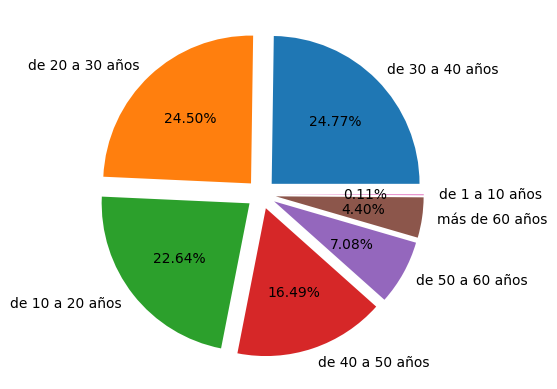

In [ ]:
#Agregamos una columna de agrupación categórica por edades (grupo_edades):

edades = ["de 1 a 10 años","de 10 a 20 años","de 20 a 30 años", "de 30 a 40 años", "de 40 a 50 años", "de 50 a 60 años", "más de 60 años"]
condEdades = [(df['edad_persona_en_situacion_de_violencia']<10) & (df['edad_persona_en_situacion_de_violencia']>0),(df['edad_persona_en_situacion_de_violencia']<20),(df['edad_persona_en_situacion_de_violencia']<30),(df['edad_persona_en_situacion_de_violencia']<40),(df['edad_persona_en_situacion_de_violencia']<50),(df['edad_persona_en_situacion_de_violencia']<=60),(df['edad_persona_en_situacion_de_violencia']>0)]
df['grupo_edad'] = np.select(condEdades,edades)
totalEdades = df['grupo_edad'].value_counts()

print(f'Totales de casos por agrupación de edad (excluyendo no informados):')

fig, ax = plt.subplots()
ax.pie(totalEdades, labels=totalEdades.index, autopct='%1.2f%%', explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.show()

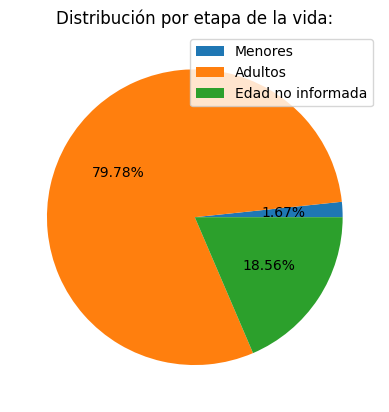

In [ ]:
#Contamos la cantidad de menores y mayores sobre el total de casos. Tambión contamos los casos con edad no informada:

#Excluimos las edades no informadas
edad = df[(df['edad_persona_en_situacion_de_violencia']>0)].edad_persona_en_situacion_de_violencia

menores = df[(df.edad_persona_en_situacion_de_violencia<18) & (df.edad_persona_en_situacion_de_violencia>0)]
adultos = df[df.edad_persona_en_situacion_de_violencia>17]
edadNoInformada = df[df.edad_persona_en_situacion_de_violencia==0]

contarMenores=menores['edad_persona_en_situacion_de_violencia'].count()
contarAdultos=adultos['edad_persona_en_situacion_de_violencia'].count()
contarEdadNoInformada = df[df.edad_persona_en_situacion_de_violencia==0].edad_persona_en_situacion_de_violencia.count()

fig, ax = plt.subplots()
plt.title("Distribución por etapa de la vida:")
ax.pie([contarMenores,contarAdultos,contarEdadNoInformada], autopct='%1.2f%%')
ax.legend(labels=['Menores','Adultos','Edad no informada'])
plt.show()

875


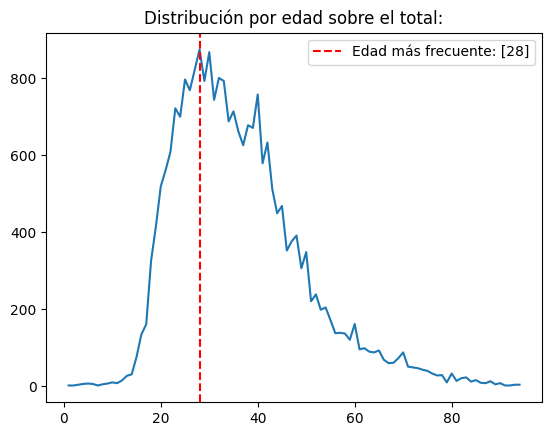

count    23821.000000
mean        36.133664
std         13.003288
min          1.000000
25%         27.000000
50%         34.000000
75%         43.000000
max         94.000000
Name: edad_persona_en_situacion_de_violencia, dtype: float64
0    28
Name: edad_persona_en_situacion_de_violencia, dtype: int64


In [ ]:
#Hacemos un análisis estadístico básico de la edad, y le sumamos mediana, moda y varianza. Lo ideal sería poder hacerlo con concat.

edadAnalisis = edad.describe()
edadModa = edad.mode()
edadVarianza = edad.var()
edadAgrupada = edad.value_counts()
edadAgrupada = edadAgrupada.sort_index()
print(edadAgrupada[28])

fig, ax = plt.subplots()
plt.title("Distribución por edad sobre el total:")
ax.plot(edadAgrupada.index,edadAgrupada.values)
ax.axvline(x=edadModa.values, color='r',label="Edad más frecuente: "+str(edadModa.values), linestyle="dashed")
ax.legend()
plt.show()

print(edadAnalisis)
print(edadModa)

#Tenemos que buscar la forma de graficar esto.


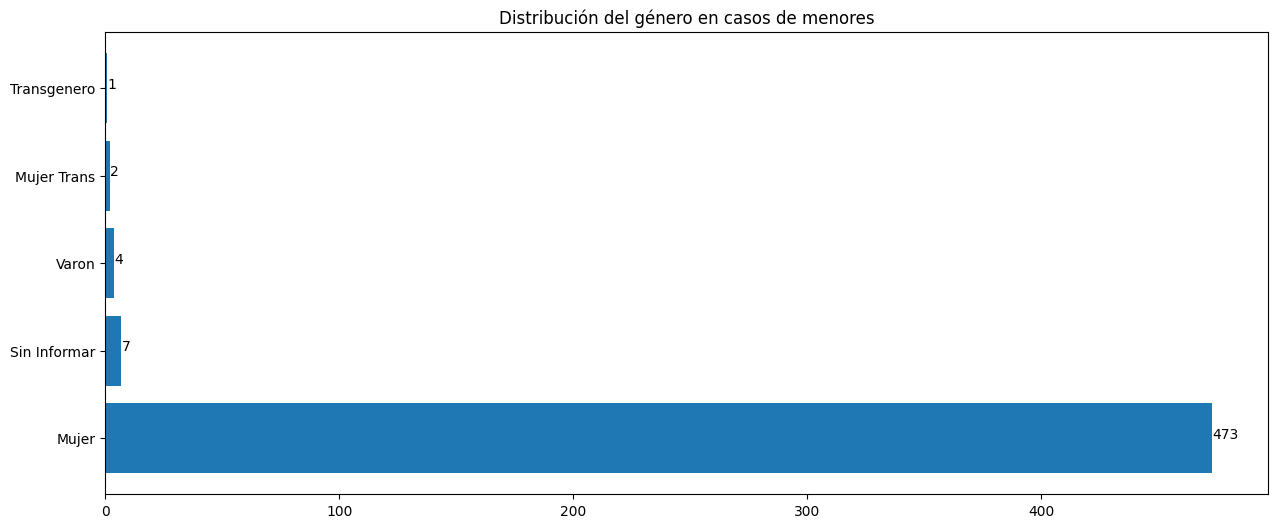

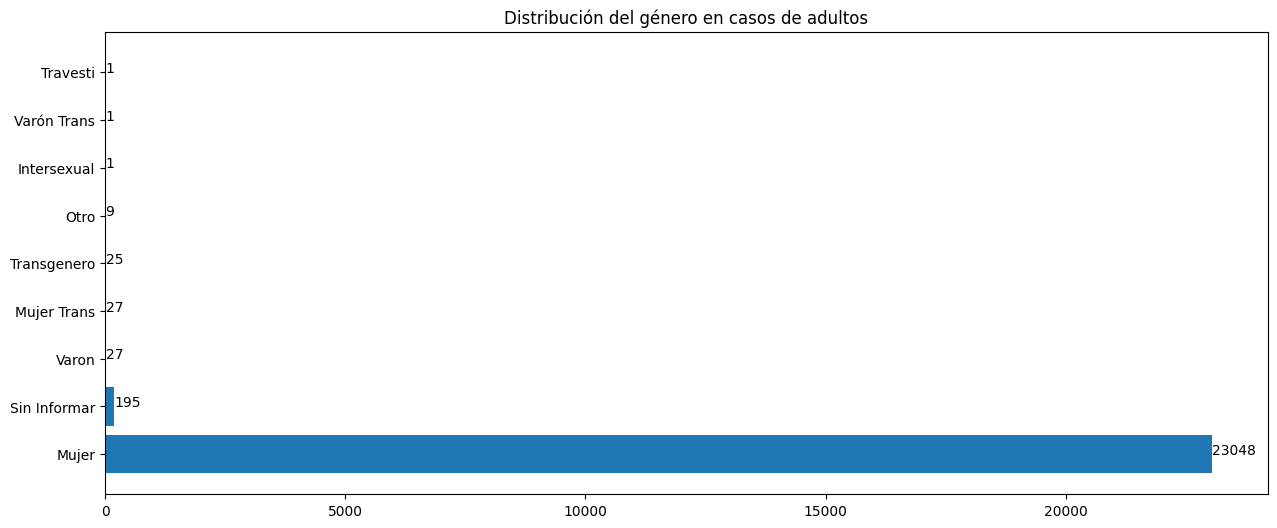

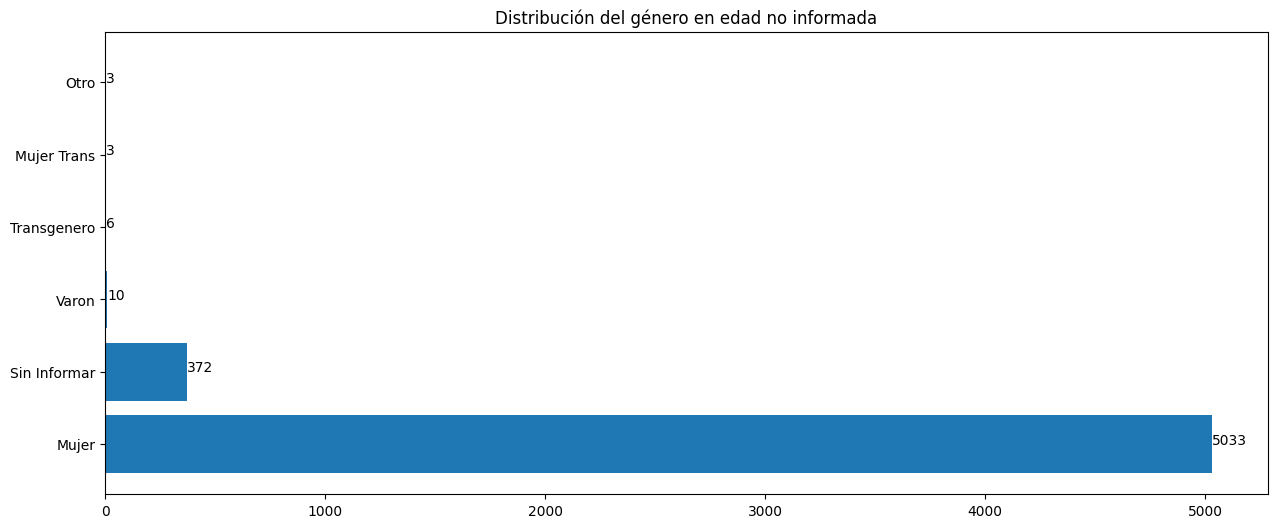

In [ ]:
#Mostramos la distribución de casos por género tanto para adultos como para menores:

generoPorMenores=menores.genero_persona_en_situacion_de_violencia.value_counts()
generoPorAdultos = adultos.genero_persona_en_situacion_de_violencia.value_counts()
generoPorNoInformado = edadNoInformada.genero_persona_en_situacion_de_violencia.value_counts()



fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title("Distribución del género en casos de menores")
bar = ax.barh(generoPorMenores.index, generoPorMenores.values)
for i in range(len(generoPorMenores.index)):
  plt.text(generoPorMenores.values[i],i,generoPorMenores.values[i])
plt.show()
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title("Distribución del género en casos de adultos")
ax.barh(generoPorAdultos.index, generoPorAdultos.values)
for i in range(len(generoPorAdultos.index)):
  plt.text(generoPorAdultos.values[i],i,generoPorAdultos.values[i])
plt.show()
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title("Distribución del género en edad no informada")
ax.barh(generoPorNoInformado.index, generoPorNoInformado.values)
for i in range(len(generoPorNoInformado.index)):
  plt.text(generoPorNoInformado.values[i],i,generoPorNoInformado.values[i])
plt.show()



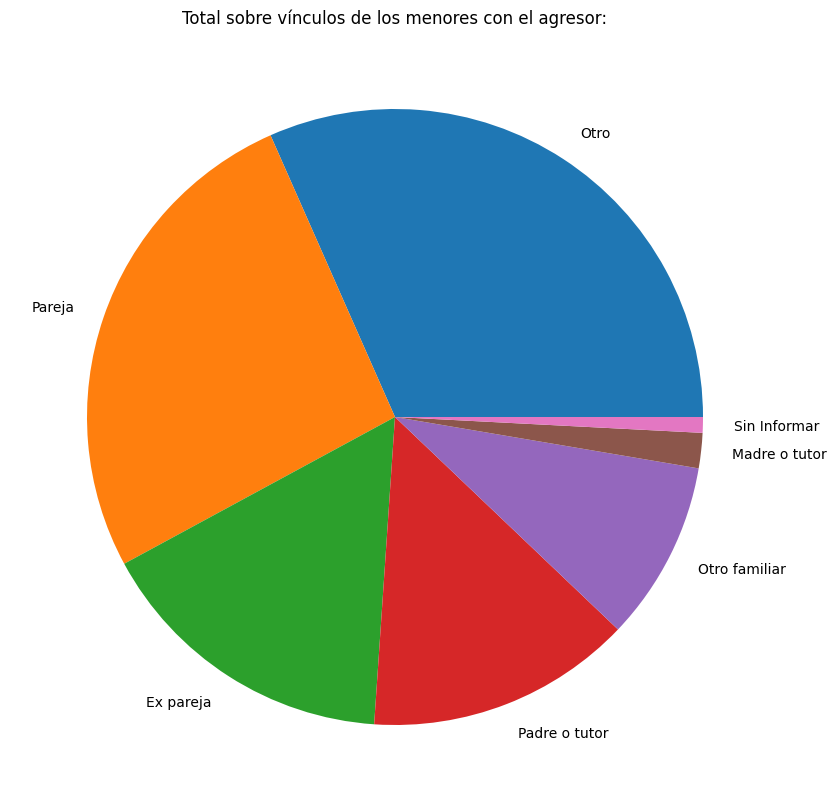

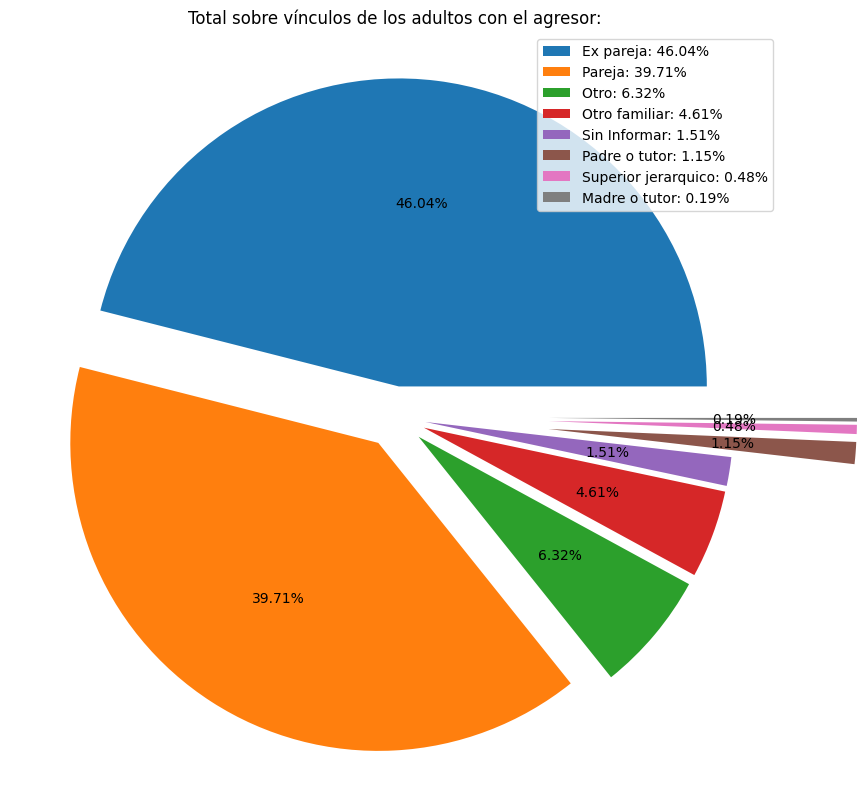

vinculo_con_la_persona_agresora  genero_de_la_persona_agresora
Pareja                           Varon                            123
Otro                             Varon                            120
Ex pareja                        Varon                             74
Padre o tutor                    Varon                             59
Otro familiar                    Varon                             43
Otro                             No informado                      33
Padre o tutor                    No informado                       9
Madre o tutor                    Mujer                              6
Ex pareja                        No informado                       4
Pareja                           No informado                       4
Madre o tutor                    Varon                              3
Sin Informar                     No informado                       3
Pareja                           Mujer Trans                        1
Otro familiar              

In [ ]:
#Mostramos los vínculos con el agresor, respectivamente para los menores y para los mayores. Por total y por género del agresor:

#Quizás acá sería más interesante si desglosamos NNyA (niños, niñas y adolescentes) en niños y adolescentes por separado.

vinculoMenoresAgresor = menores['vinculo_con_la_persona_agresora'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.pie(vinculoMenoresAgresor.values, labels=vinculoMenoresAgresor.index)
plt.title("Total sobre vínculos de los menores con el agresor:")
plt.show()

vinculoAdultosAgresor = adultos['vinculo_con_la_persona_agresora'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

#hacemos desempaquetado de las variables que devuelve el gráfico:
values, _, percentages = ax.pie(vinculoAdultosAgresor.values , explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5), autopct='%1.2f%%')
#y con los porcentajes, creamos una lista con compresión de listas para agregárselos a los labels
lab=[f'{index}: {porc_porcion.get_text()}' for index, porc_porcion in zip(vinculoAdultosAgresor.index, percentages)]
#me gustaría hacer lo de arriba sin mostrar los porcentajes en el gráfico

plt.title("Total sobre vínculos de los adultos con el agresor:")
ax.legend(labels=lab)
plt.show()

print(menores[['vinculo_con_la_persona_agresora','genero_de_la_persona_agresora']].value_counts())
print(adultos[['vinculo_con_la_persona_agresora','genero_de_la_persona_agresora']].value_counts())

#Tenemos que buscar cómo graficar estos dos últimos.

#Acá intenté ver qué había ocurrido con el caso más bajo en edad
#elMenor = menores.iloc[0]
#print(elMenor)



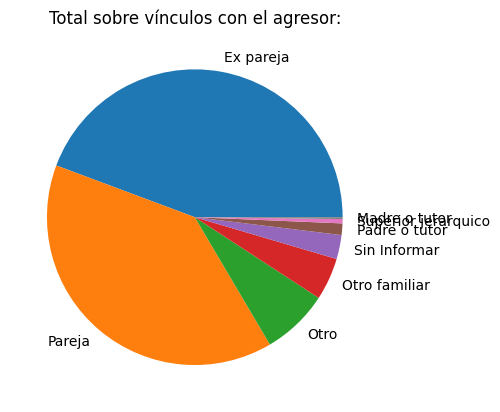

vinculo_con_la_persona_agresora  genero_de_la_persona_agresora
Ex pareja                        Varon                            12167
Pareja                           Varon                            10624
Otro                             Varon                             1692
Otro familiar                    Varon                             1118
Pareja                           No informado                       782
Ex pareja                        No informado                       748
Sin Informar                     No informado                       500
Otro                             No informado                       377
Padre o tutor                    Varon                              331
Sin Informar                     Varon                              263
Otro familiar                    Mujer                              146
Superior jerarquico              Varon                              117
Otro familiar                    No informado                        58
P

In [ ]:
#Mostramos los vínculos con el agresor sobre el total y la distribución por género
vinculoAgresor = df['vinculo_con_la_persona_agresora'].value_counts()

fig, ax = plt.subplots()
ax.pie(vinculoAgresor.values, labels=vinculoAgresor.index)
plt.title("Total sobre vínculos con el agresor:")
plt.show()

print(df[['vinculo_con_la_persona_agresora','genero_de_la_persona_agresora']].value_counts())

#Hay que buscar la forma de graficar este último

In [ ]:
#Mostramos el vínculo predominante en cada grupo de edad:
vinculosPorEdad = df.groupby('grupo_edad').vinculo_con_la_persona_agresora.value_counts()
print(vinculosPorEdad)

#Hay que buscar la forma de graficar esto

grupo_edad       vinculo_con_la_persona_agresora
de 1 a 10 años   Otro                                 17
                 Padre o tutor                         8
                 Ex pareja                             2
                 Otro familiar                         2
                 Pareja                                2
                 Madre o tutor                         1
de 10 a 20 años  Ex pareja                          2472
                 Pareja                             2466
                 Otro                                747
                 Sin Informar                        429
                 Otro familiar                       313
                 Padre o tutor                       141
                 Superior jerarquico                  33
                 Madre o tutor                        21
de 20 a 30 años  Ex pareja                          3428
                 Pareja                             2806
                 Otro                  

In [ ]:
#Totales, provincia con mínimo, y provincia con máximo.

totalesPorProv = df.groupby('Ubicación').genero_persona_en_situacion_de_violencia.count()
print(totalesPorProv)
print(totalesPorProv.max())
print(totalesPorProv.min())

#Tenemos que graficar esto, y si usamos geopandas?

Ubicación
Buenos Aires, Argentina                                             16423
Catamarca, Argentina                                                   73
Chaco, Argentina                                                      238
Chubut, Argentina                                                      96
Ciudad Autónoma de Buenos Aires, Argentina                           5217
Corrientes, Argentina                                                 136
Córdoba, Argentina                                                    824
Entre Ríos, Argentina                                                 209
Formosa, Argentina                                                    117
Jujuy, Argentina                                                      443
La Pampa, Argentina                                                    25
La Rioja, Argentina, Argentina                                         65
Mendoza, Argentina                                                   1178
Misiones, Argentina         

In [ ]:
#Podríamos agregar un dataset con el total de población de cada provincia para ver la proporción

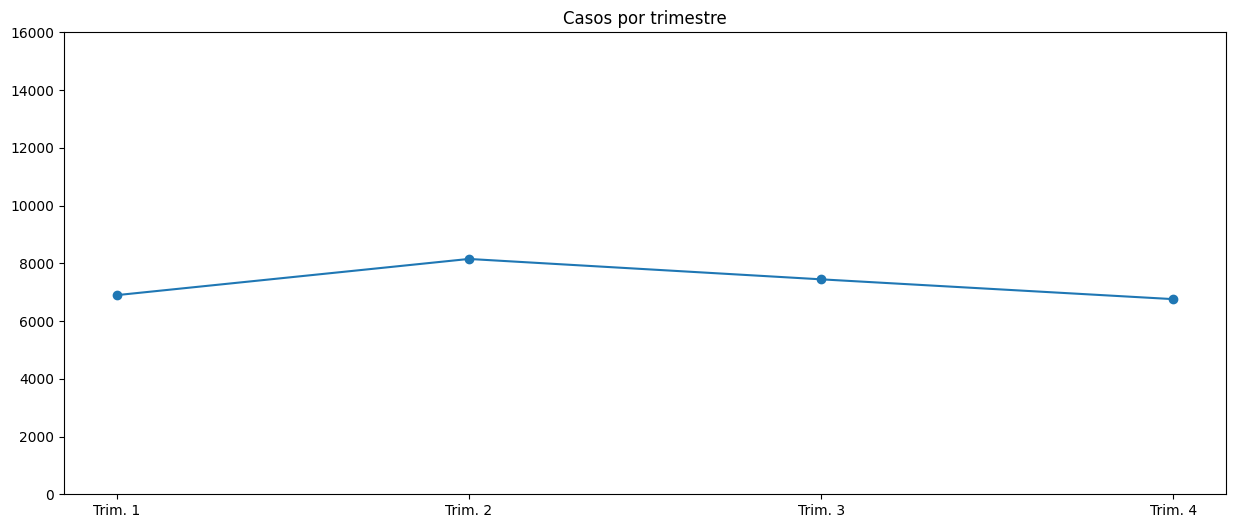

Trim. 1    6896
Trim. 2    8150
Trim. 3    7444
Trim. 4    6758
Name: Trimestre, dtype: int64


In [ ]:
#Mostramos los totales de casos por trimestre para poder calcular una tendencia.
trimestres = ['Trim. 1','Trim. 2','Trim. 3','Trim. 4']
conteoTrimestre = df['Trimestre'].value_counts()
conteoTrimestre = conteoTrimestre.reindex(trimestres,axis=0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title('Casos por trimestre')
ax.plot(conteoTrimestre.index,conteoTrimestre.values,marker='o')
ax.set_ylim(bottom=0,top=16000)
plt.show()

print(conteoTrimestre)

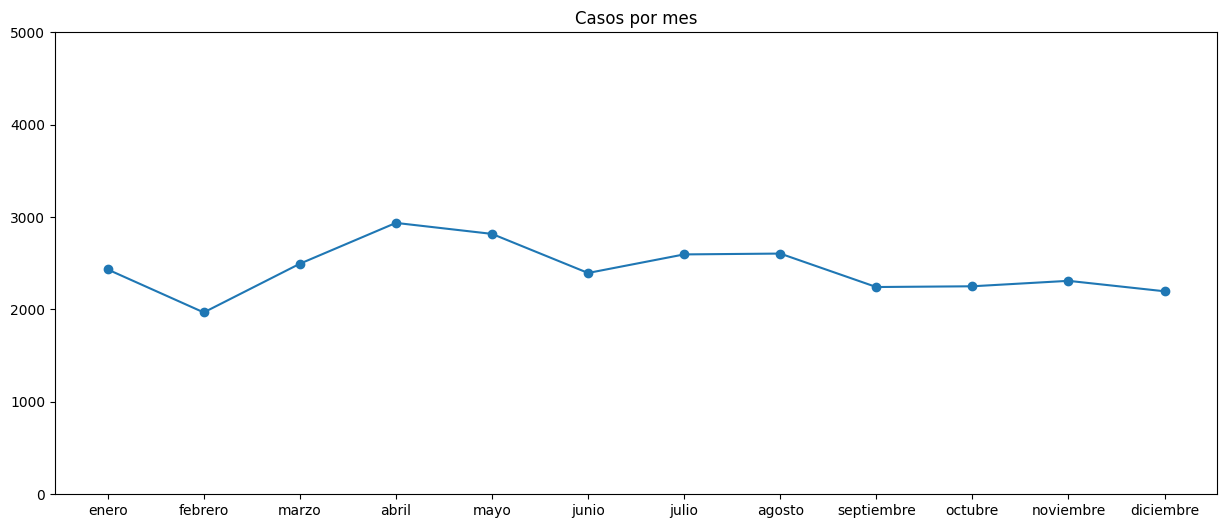

enero         2433
febrero       1968
marzo         2495
abril         2937
mayo          2818
junio         2395
julio         2596
agosto        2605
septiembre    2243
octubre       2251
noviembre     2310
diciembre     2197
Name: Mes, dtype: int64


In [ ]:
#Mostramos los totales de casos por mes para poder calcular una tendencia.

meses = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
casosPorMes = df['Mes'].value_counts()
casosPorMes = casosPorMes.reindex(meses,axis=0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title('Casos por mes')
ax.plot(casosPorMes.index,casosPorMes.values,marker='o')
ax.set_ylim(bottom=0, top=5000)
plt.show()

print(casosPorMes)

In [ ]:
#Mostramos los cálculos estadísticos básicos para cada mes:

analisisMes = casosPorMes.describe().loc[['min','max','mean','25%','50%','75%']]
stdMes = casosPorMes.std()

xpoints = np.array(analisisMes.index)
ypoints = np.array(analisisMes.values)
plt.boxplot(ypoints)
plt.show()

print(stdMes)

#¿De qué nos serviría graficar la desviación estándar?

In [ ]:
#Hacemos un gráfico de dispersión por cada tipo de modalidad según edad.


modalidades = ['modalidad_de_violencia_institucional','modalidad_de_violencia_laboral','modalidad_de_violencia_mediatica','modalidad_de_violencia_obstetrica','modalidad_de_violencia_otras','modalidad_violencia_contra_libertad_reproductiva']
modalidadesTitulos = ['Violencia Institucional', 'Violencia Laboral', 'Violencia Mediática', 'Violencia Obstétrica', 'Otras modalidades', 'Libertad Reproductiva']
edad = df[(df['edad_persona_en_situacion_de_violencia']>0)]

#creamos una lista con comprensión para cada edad según modalidad

modalidadAgrupada = [edad[['edad_persona_en_situacion_de_violencia',mod]].groupby('edad_persona_en_situacion_de_violencia').value_counts().reset_index() for mod in modalidades]

for i in range(len(modalidadAgrupada)):
  fig = plt.gcf()
  plt.title(modalidades[i])
  plt.scatter(modalidadAgrupada[i]['edad_persona_en_situacion_de_violencia'],modalidadAgrupada[i][0])
  fig.set_size_inches(16, 3)
  plt.show()

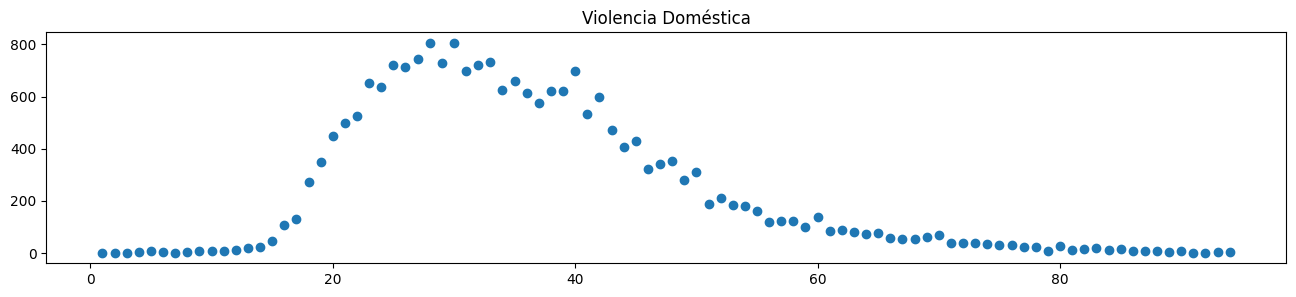

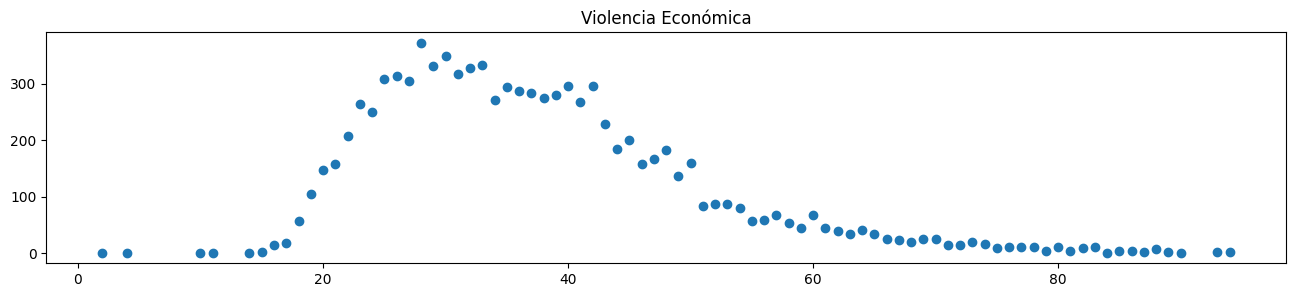

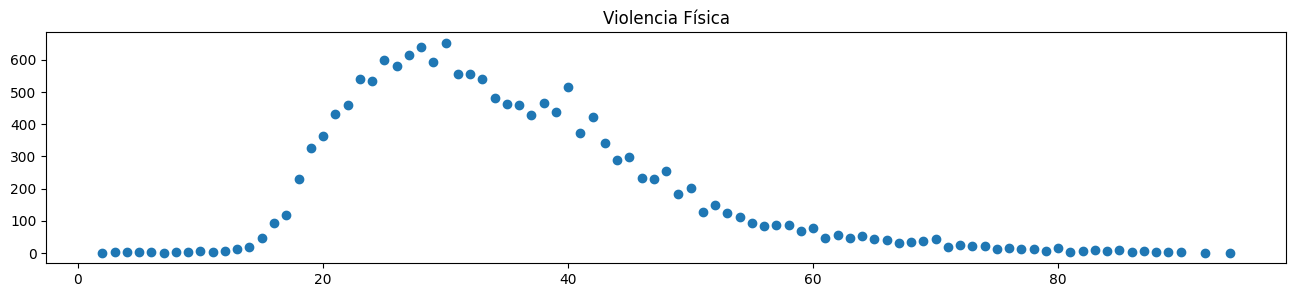

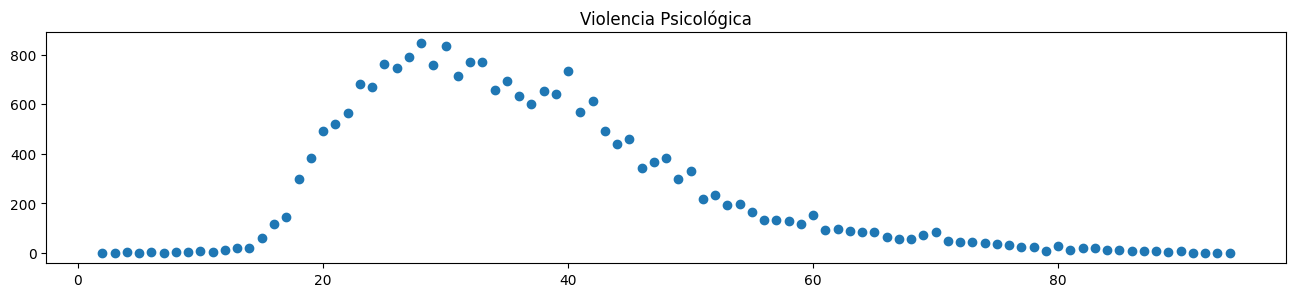

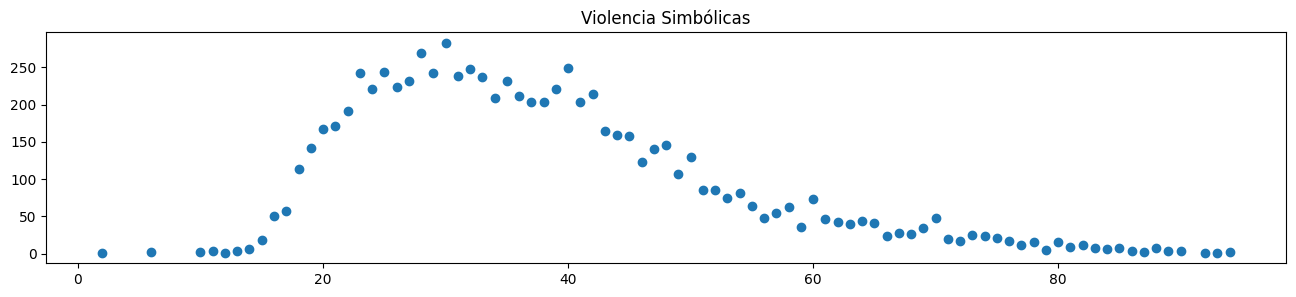

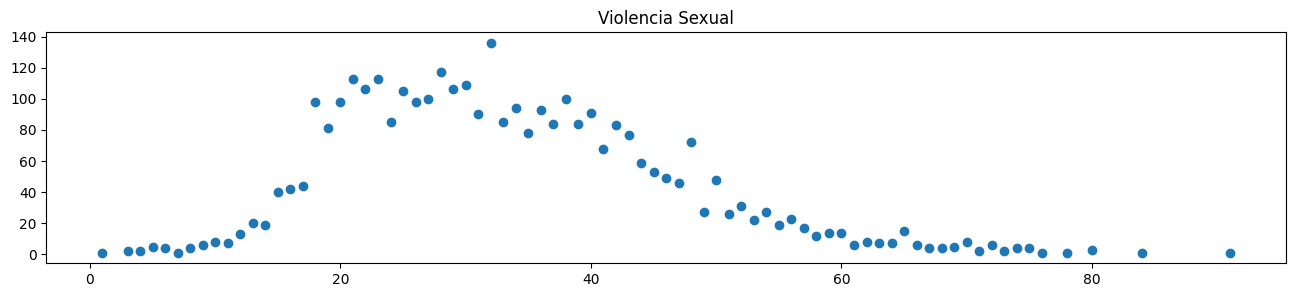

In [ ]:
#Hacemos un gráfico de dispersión por cada tipo de violencia según edad.


violencias = ['tipo_de_violencia_domestica','tipo_de_violencia_economica_y_patrimonial','tipo_de_violencia_fisica','tipo_de_violencia_psicologica','tipo_de_violencia_simbolica','tipo_de_violencia_sexual']
violenciasTitulos = ['Violencia Doméstica', 'Violencia Económica', 'Violencia Física', 'Violencia Psicológica', 'Violencia Simbólicas', 'Violencia Sexual']
edad = df[(df['edad_persona_en_situacion_de_violencia']>0)]

#creamos una lista con comprensión para cada edad según modalidad

violenciasAgrupada = [edad[['edad_persona_en_situacion_de_violencia',mod]].groupby('edad_persona_en_situacion_de_violencia').value_counts().reset_index() for mod in modalidades]

for i in range(len(violenciasAgrupada)):
  fig = plt.gcf()
  plt.title(violenciasTitulos[i])
  plt.scatter(violenciasAgrupada[i]['edad_persona_en_situacion_de_violencia'],violenciasAgrupada[i][0])
  fig.set_size_inches(16, 3)
  plt.show()

#En este ejemplo, lo que me doy cuenta es que estamos calculando las cantidad de violencias por edad, cuando quizás sería más interesante calcular la proporción de esas violencias por edad.

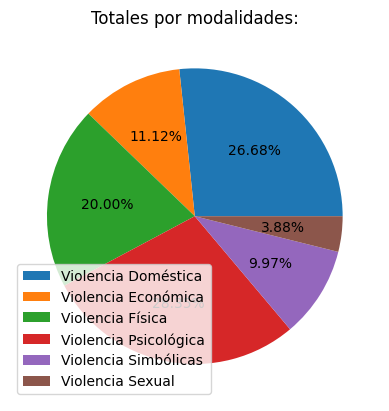

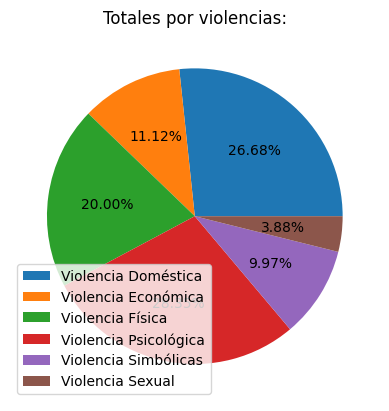

In [ ]:
sumaModalidades = df[modalidades].sum()
sumaTiposViolencia = df[violencias].sum()

fig, ax = plt.subplots()
plt.title("Totales por modalidades:")
ax.pie(sumaModalidades, autopct='%1.2f%%')
ax.legend(labels=violenciasTitulos)
plt.show()

fig, ax = plt.subplots()
plt.title("Totales por violencias:")
ax.pie(sumaTiposViolencia, autopct='%1.2f%%')
ax.legend(labels=violenciasTitulos)
plt.show()
